In [1]:
using CausalForest
using Plots
using StatsBase

In [2]:
indices,X,T,Y = load_data("causal");
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].>0.5;

# Subsampling not honest

In [3]:
cf1 = build_forest(false, false, false, Y, T, X, -1, 100);
pred1 = apply_forest(cf1, Xtest);

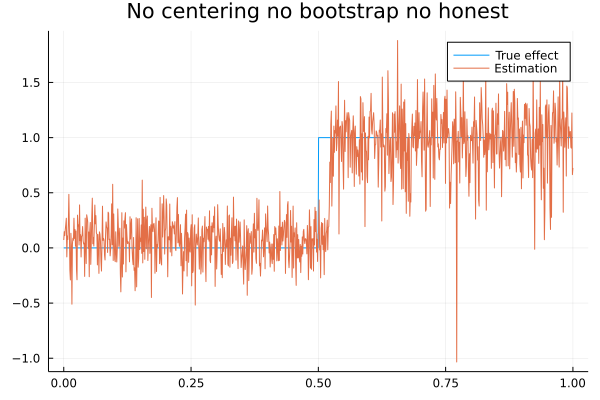

In [14]:
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "No centering no bootstrap no honest", fmt = :png)

In [4]:
cf2 = build_forest(true, false, false, Y, T, X, -1, 100);
pred2 = apply_forest(cf2, Xtest);

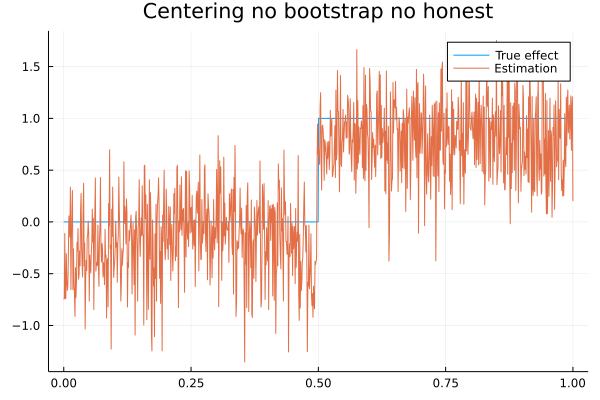

In [15]:
plot(Xtest[:, 1], [true_effect, pred2], label=["True effect" "Estimation"], title = "Centering no bootstrap no honest", fmt = :png)

In [13]:
rmsd(float(true_effect), pred1)

0.2845811332673699

In [14]:
rmsd(float(true_effect), pred2)

0.45592629372077975

# Subsampling honest

In [15]:
cf3 = build_forest(false, false, true, Y, T, X, -1, 100);
pred3 = apply_forest(cf3, Xtest);

In [16]:
cf4 = build_forest(true, false, true, Y, T, X, -1, 100);
pred4 = apply_forest(cf4, Xtest);

In [17]:
rmsd(float(true_effect), pred3)

0.16728909523894633

In [18]:
rmsd(float(true_effect), pred4)

0.1210270264636771

# Bootstrap not honest

In [19]:
cf5 = build_forest(false, true, false, Y, T, X, -1, 100);
pred5 = apply_forest(cf5, Xtest);

In [20]:
cf6 = build_forest(true, true, false, Y, T, X, -1, 100);
pred6 = apply_forest(cf6, Xtest);

In [21]:
rmsd(float(true_effect), pred5)

0.21231128308000533

In [22]:
rmsd(float(true_effect), pred6)

0.23135700210767313

# Bootstrap honest

In [23]:
cf7 = build_forest(false, true, true, Y, T, X, -1, 100);
pred7 = apply_forest(cf7, Xtest);

In [24]:
cf8 = build_forest(true, true, true, Y, T, X, -1, 100);
pred8 = apply_forest(cf8, Xtest);

In [25]:
rmsd(float(true_effect), pred7)

0.17348622520208054

In [26]:
rmsd(float(true_effect), pred8)

0.1355904209310276

# 500 arbres

# Subsampling not honest

In [27]:
cf1 = build_forest(false, false, false, Y, T, X, -1, 500);
pred1 = apply_forest(cf1, Xtest);

In [28]:
cf2 = build_forest(true, false, false, Y, T, X, -1, 500);
pred2 = apply_forest(cf2, Xtest);

In [29]:
rmsd(float(true_effect), pred1)

0.2775185546838352

In [30]:
rmsd(float(true_effect), pred2)

0.4025136283316097

# Subsampling honest

In [38]:
cf3 = build_forest(false, false, true, Y, T, X, -1, 500);
pred3 = apply_forest(cf3, Xtest);

In [39]:
cf4 = build_forest(true, false, true, Y, T, X, -1, 500);
pred4 = apply_forest(cf4, Xtest);

In [40]:
rmsd(float(true_effect), pred3)

0.15476163468614257

In [41]:
rmsd(float(true_effect), pred4)

0.11699180633588462

# Bootstrap not honest

In [42]:
cf5 = build_forest(false, true, false, Y, T, X, -1, 500);
pred5 = apply_forest(cf5, Xtest);

In [43]:
cf6 = build_forest(true, true, false, Y, T, X, -1, 500);
pred6 = apply_forest(cf6, Xtest);

In [44]:
rmsd(float(true_effect), pred5)

0.21046962736985161

In [45]:
rmsd(float(true_effect), pred6)

0.2055755009023866

# Bootstrap honest

In [46]:
cf7 = build_forest(false, true, true, Y, T, X, -1, 500);
pred7 = apply_forest(cf7, Xtest);

In [47]:
cf8 = build_forest(true, true, true, Y, T, X, -1, 500);
pred8 = apply_forest(cf8, Xtest);

In [48]:
rmsd(float(true_effect), pred7)

0.154927333522503

In [49]:
rmsd(float(true_effect), pred8)

0.11375279132406434

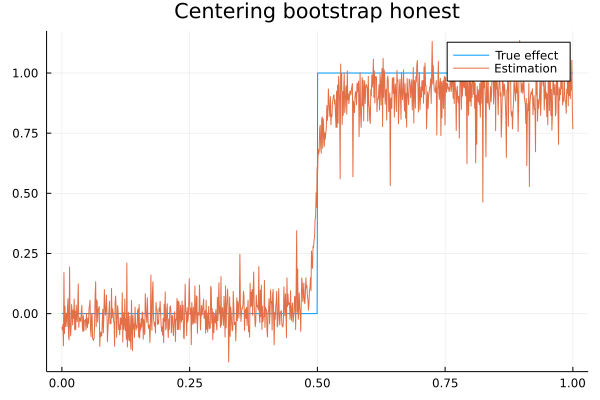

In [50]:
plot(Xtest[:, 1], [true_effect, pred8], label=["True effect" "Estimation"], title = "Centering bootstrap honest", fmt = :png)